In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit   

Lectura de los datos
Se asume que se han realizado 5 ensayos y que los archivos CSV están nombrados como ensayo_sin_ventilador_1.csv, ensayo_sin_ventilador_2.csv, ..., ensayo_sin_ventilador_5.csv.

In [10]:
# Lista para almacenar los DataFrames de cada ensayo
ensayos_sin_ventilador = []

# Leer los archivos CSV de los ensayos sin ventilador
for i in range(1, 6):
    archivo = f'CSV registros/ensayo_sin_ventilador_{i}.csv'
    df = pd.read_csv(archivo, encoding='latin1')  # Specify the encoding
    #empieza desde el segundo 80
    ensayos_sin_ventilador.append(df)

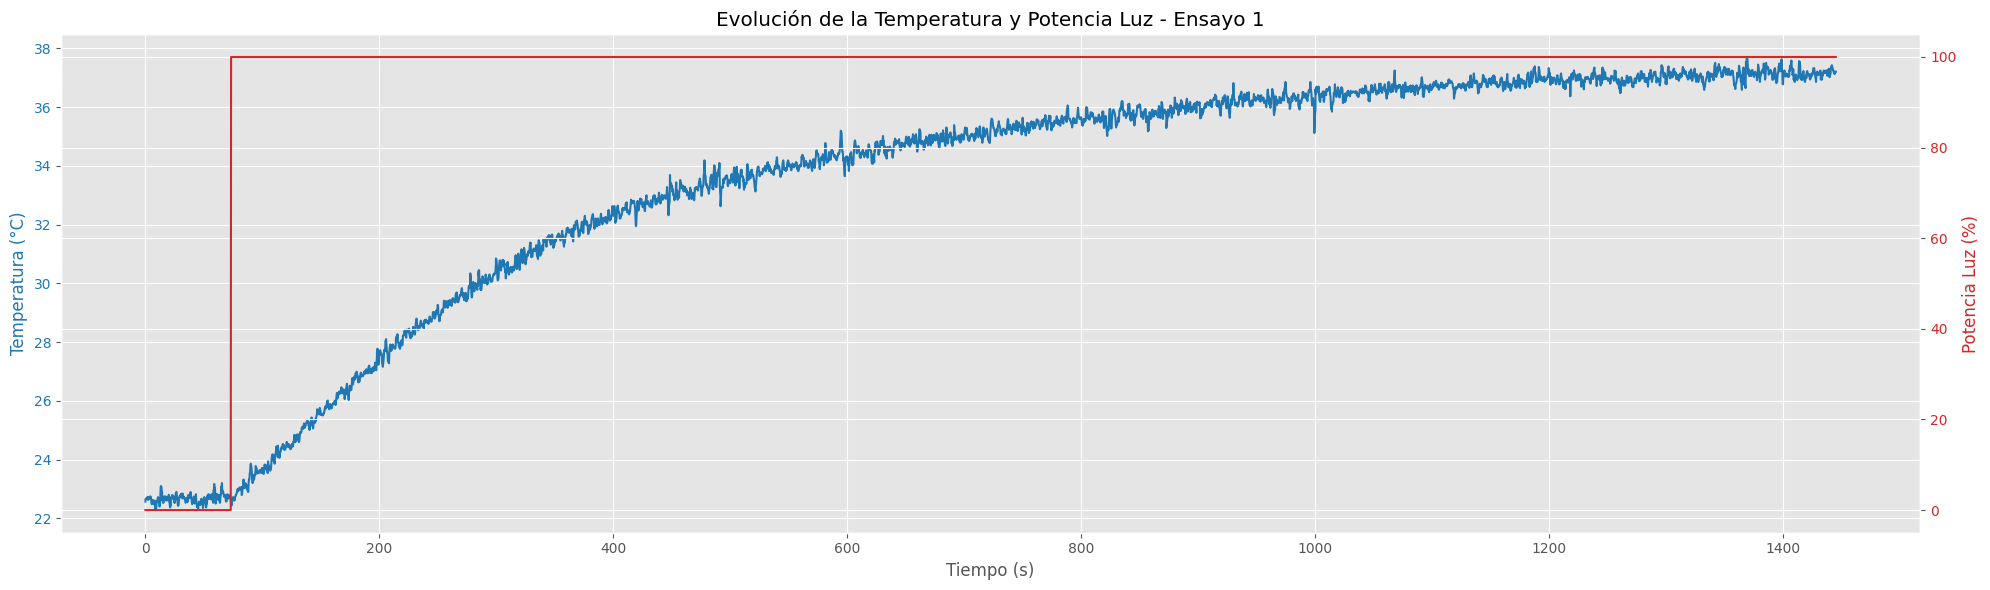

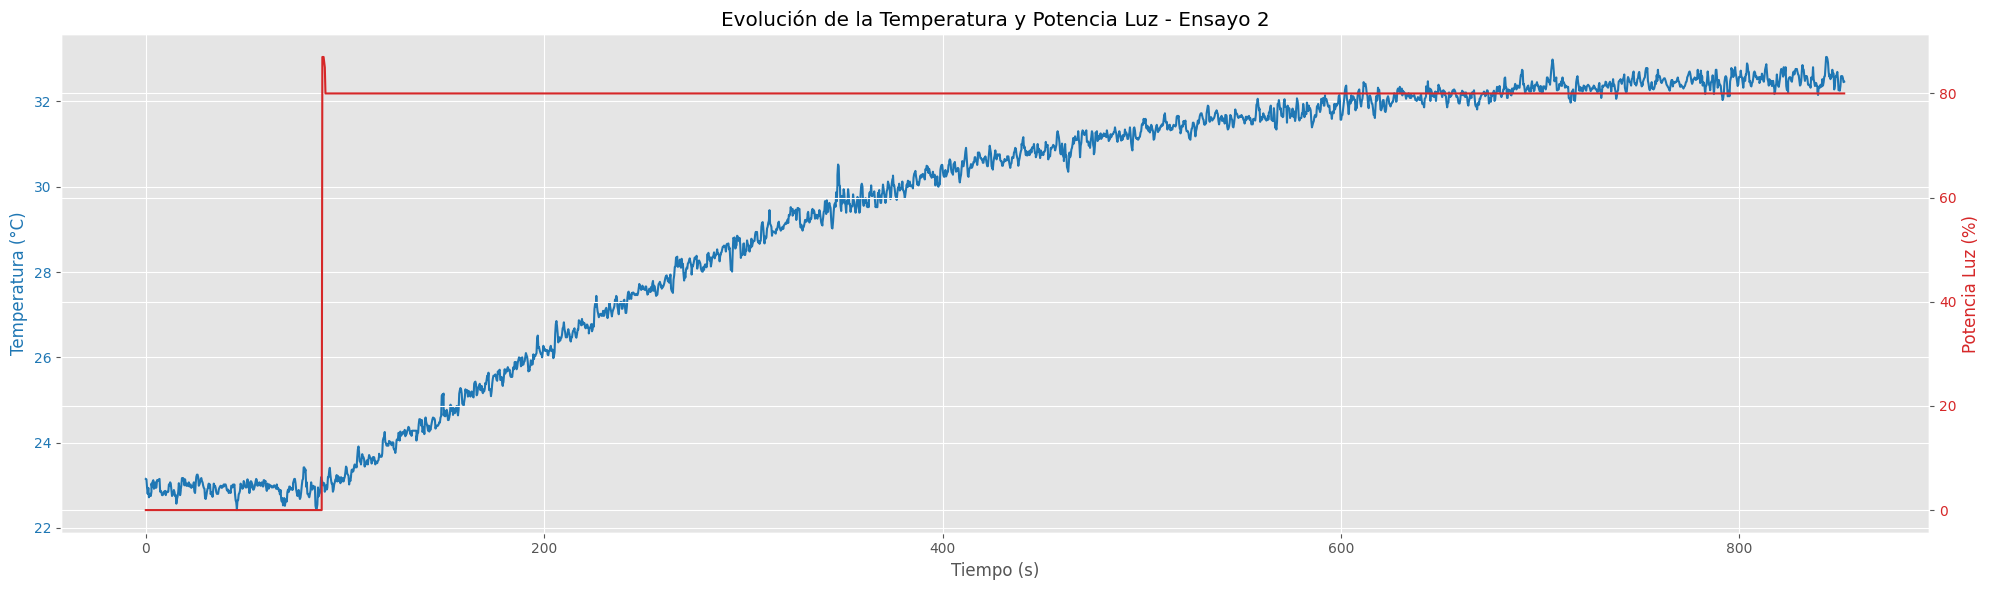

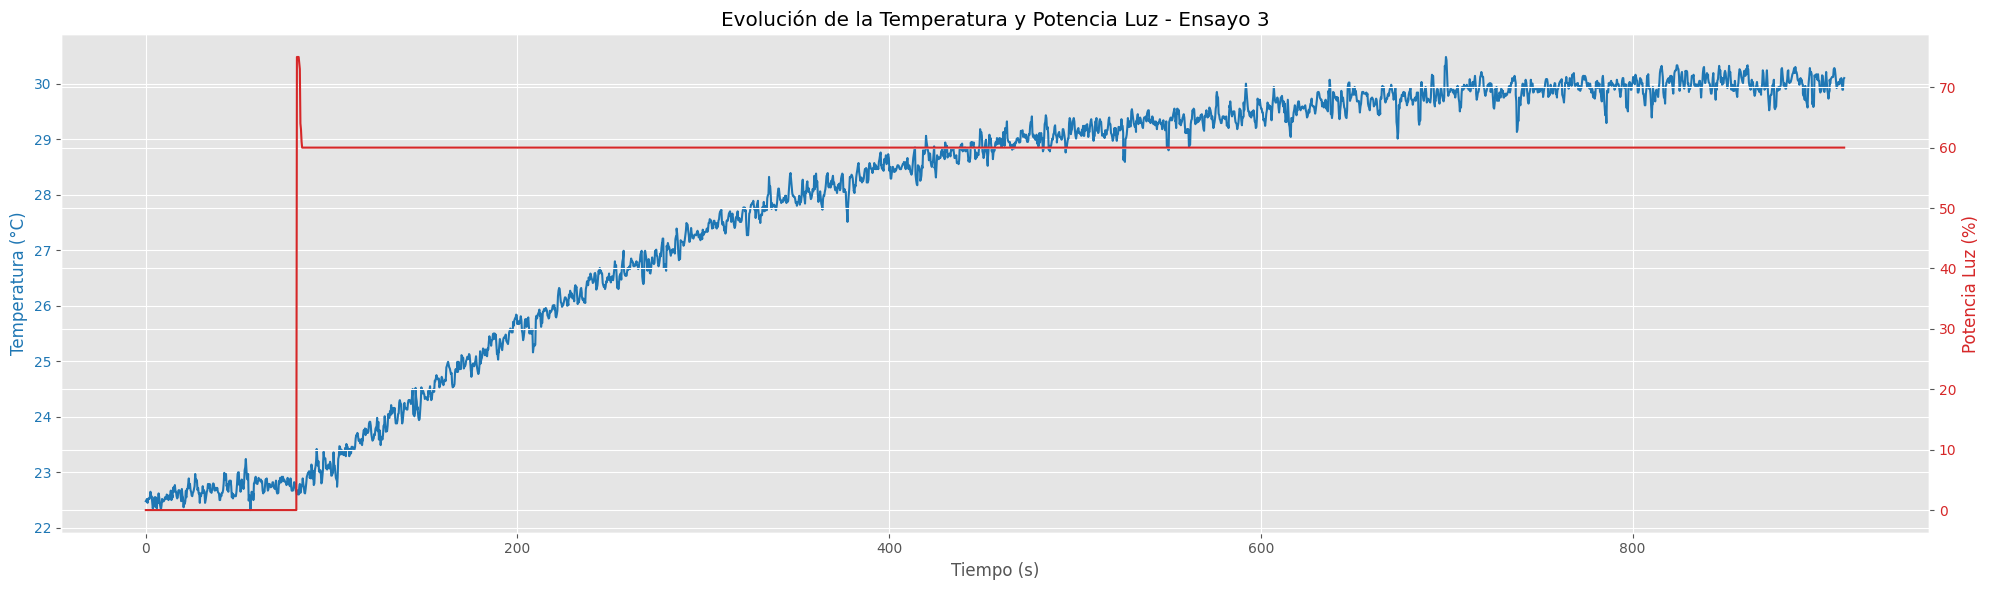

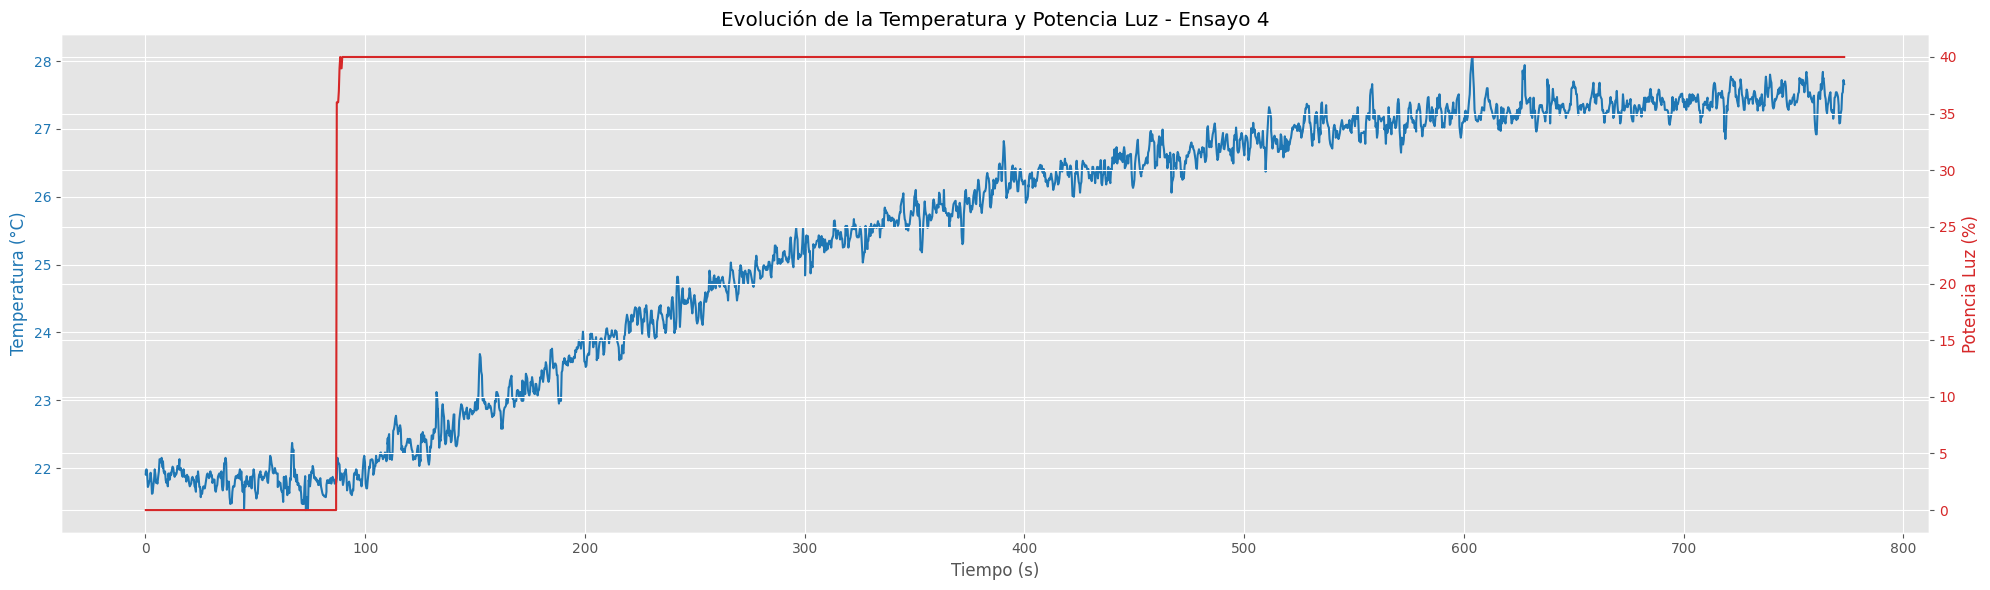

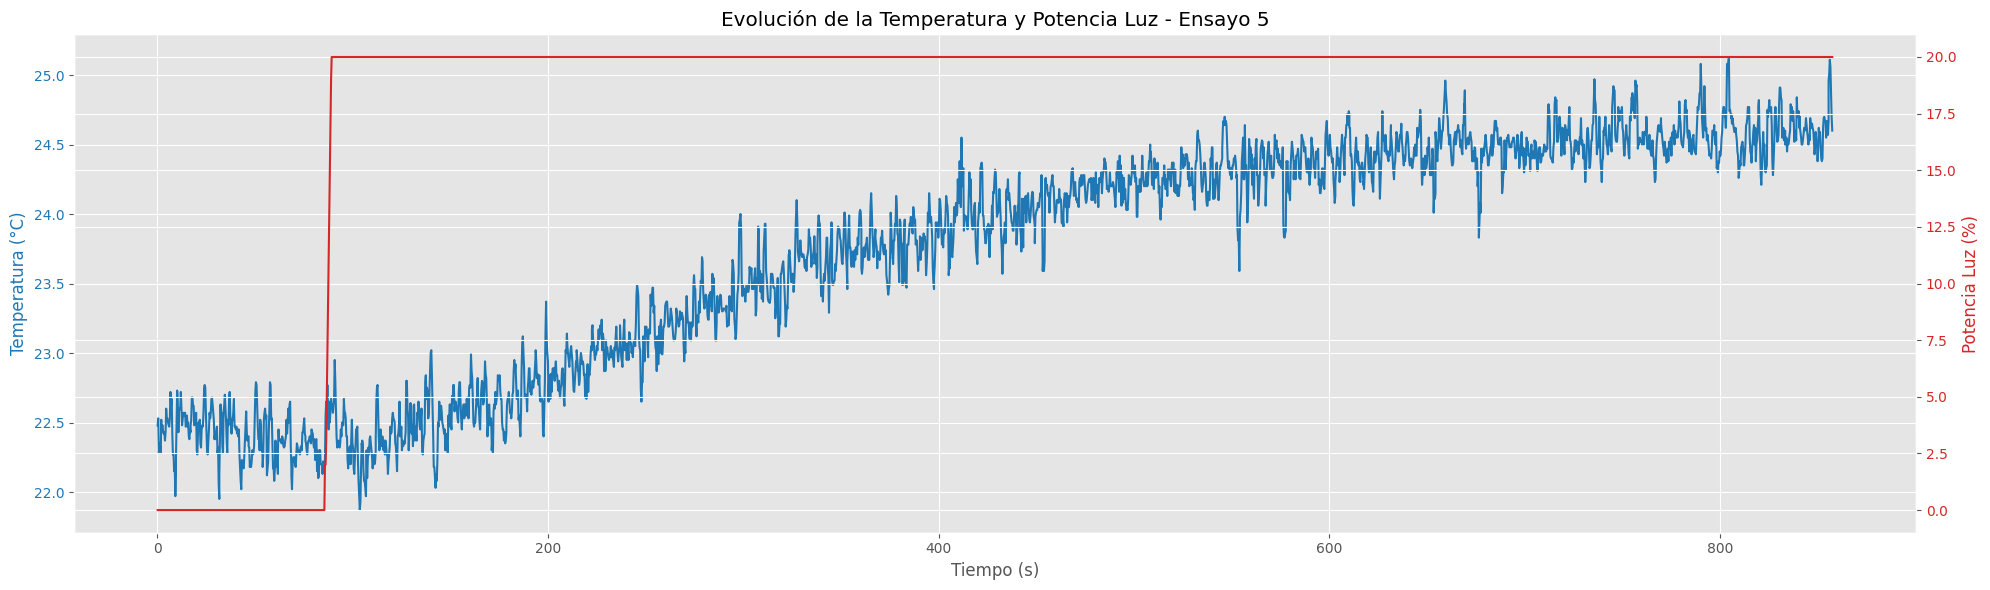

In [11]:
# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Graficar los ensayos
for i, df in enumerate(ensayos_sin_ventilador):
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Eje para la temperatura
    ax1.plot(df['Tiempo'], df['Temperatura (°C)'], label=f'Temperatura Ensayo {i+1}', color='tab:blue')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Temperatura (°C)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Crear un segundo eje para la potencia de la luz
    ax2 = ax1.twinx()
    ax2.plot(df['Tiempo'], df['Potencia Luz (%)'], label='Potencia Luz (%)', color='tab:red')
    ax2.set_ylabel('Potencia Luz (%)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Título del gráfico
    plt.title(f'Evolución de la Temperatura y Potencia Luz - Ensayo {i+1}')
    
    # Mostrar leyenda para ambos ejes
    fig.tight_layout()
    plt.show()

In [4]:
# Definir la función de primer orden que queremos ajustar
def modelo_primer_orden(t, K, tau, T_inicial):
    '''
    t: tiempo
    K: ganancia del sistema
    tau: constante de tiempo
    T_inicial: temperatura inicial
    '''
    return T_inicial + K * (1 - np.exp(-t/tau))

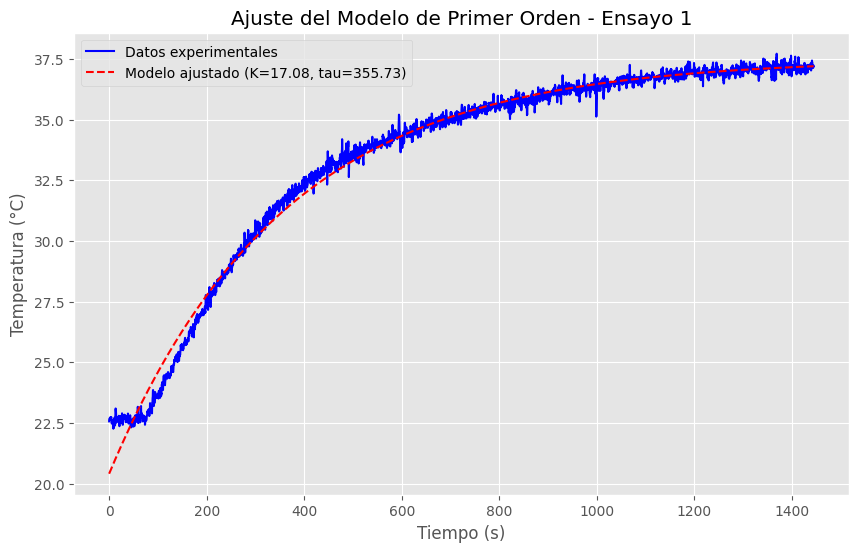

Ensayo 1: K = 17.08, tau = 355.73, T_inicial = 20.41


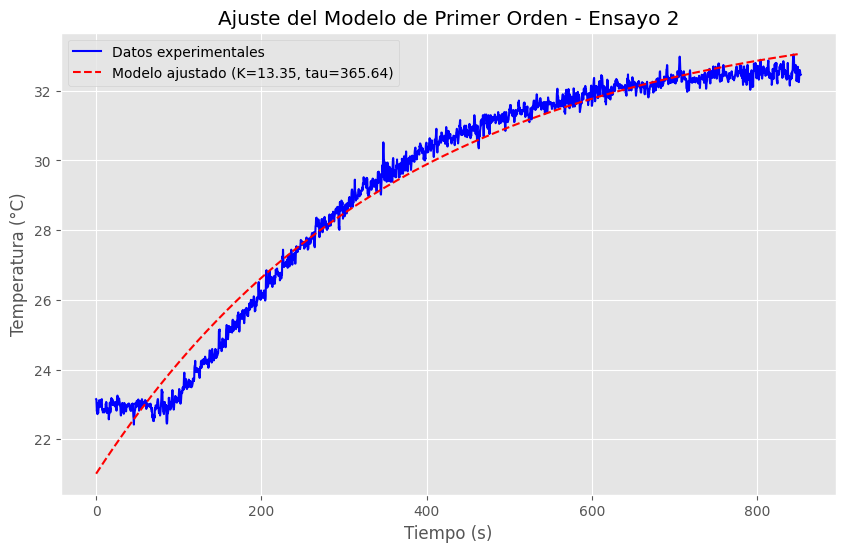

Ensayo 2: K = 13.35, tau = 365.64, T_inicial = 21.01


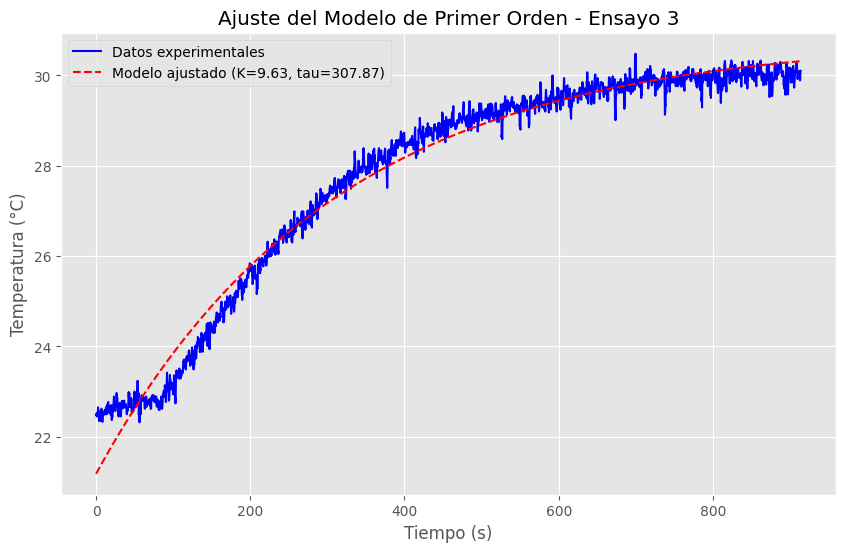

Ensayo 3: K = 9.63, tau = 307.87, T_inicial = 21.18


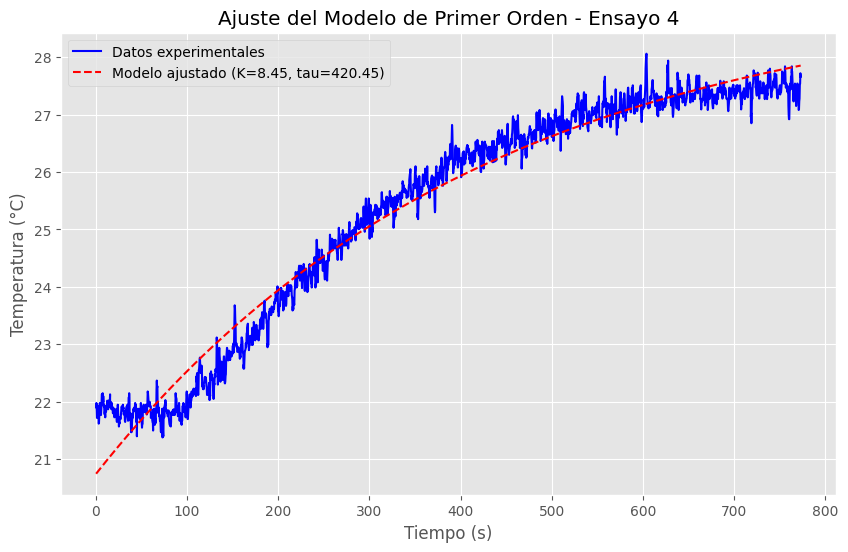

Ensayo 4: K = 8.45, tau = 420.45, T_inicial = 20.74


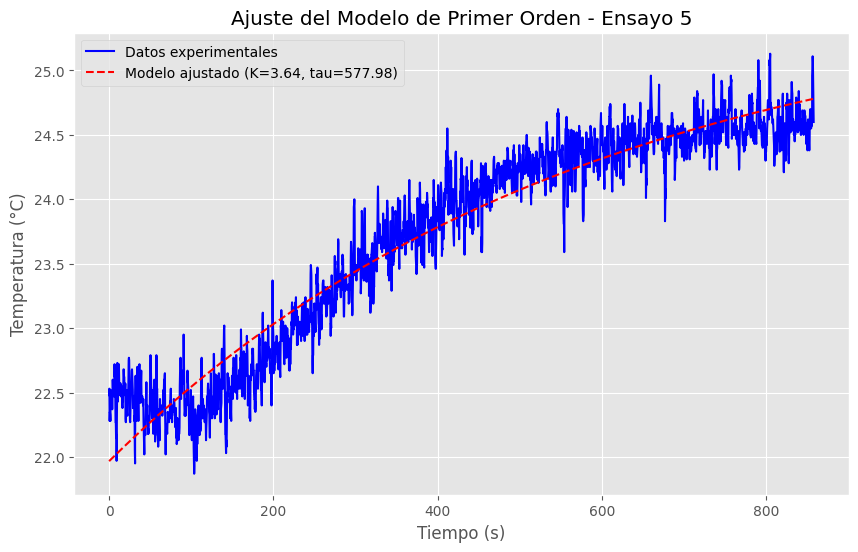

Ensayo 5: K = 3.64, tau = 577.98, T_inicial = 21.97


In [5]:
# Ajustar el modelo a los datos de cada ensayo
for i, df in enumerate(ensayos_sin_ventilador):
    # Extraer tiempo, temperatura y potencia
    tiempo = df['Tiempo'].values
    temperatura = df['Temperatura (°C)'].values
    potencia = df['Potencia Luz (%)'].values

    # Suponemos que el sistema comienza en el instante de aplicación del escalón de potencia
    #la temperatura inicial es la temperatura media en los primeros 200 segundos
    T_inicial = np.mean(temperatura[:80])
    K_inicial = potencia.max()  # Consideramos el máximo de potencia como un punto de partida para la ganancia

    # Usar curve_fit para ajustar los parámetros K y tau
    popt, pcov = curve_fit(modelo_primer_orden, tiempo, temperatura, p0=[K_inicial, 100, T_inicial])

    K, tau, T_inicial_fit = popt

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(tiempo, temperatura, label='Datos experimentales', color='blue')
    plt.plot(tiempo, modelo_primer_orden(tiempo, K, tau, T_inicial_fit), label=f'Modelo ajustado (K={K:.2f}, tau={tau:.2f})', color='red', linestyle='--')
    plt.title(f'Ajuste del Modelo de Primer Orden - Ensayo {i+1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.show()

    print(f'Ensayo {i+1}: K = {K:.2f}, tau = {tau:.2f}, T_inicial = {T_inicial_fit:.2f}')

https://chatgpt.com/share/66f782be-0118-8007-b20d-a824508cb802

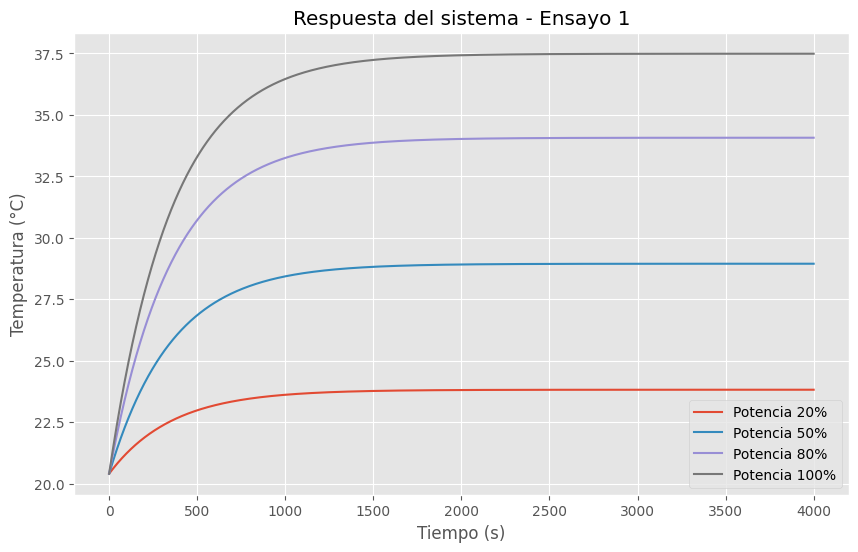

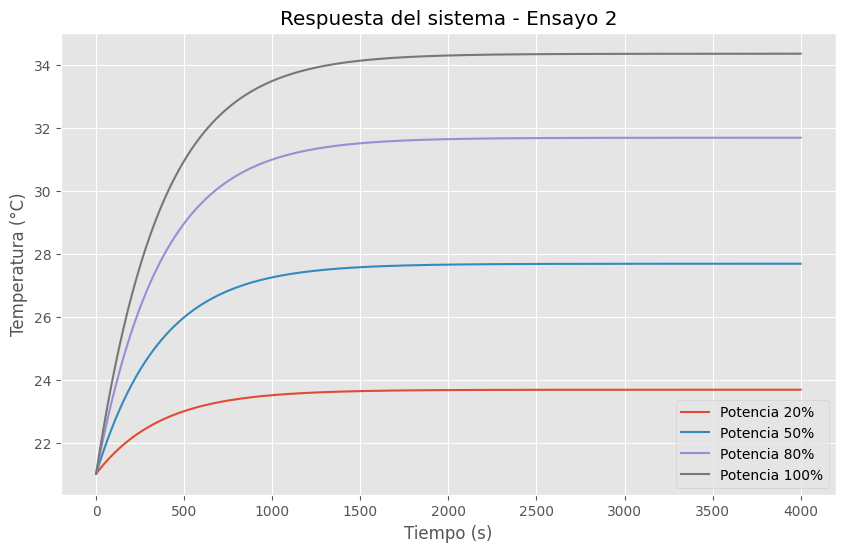

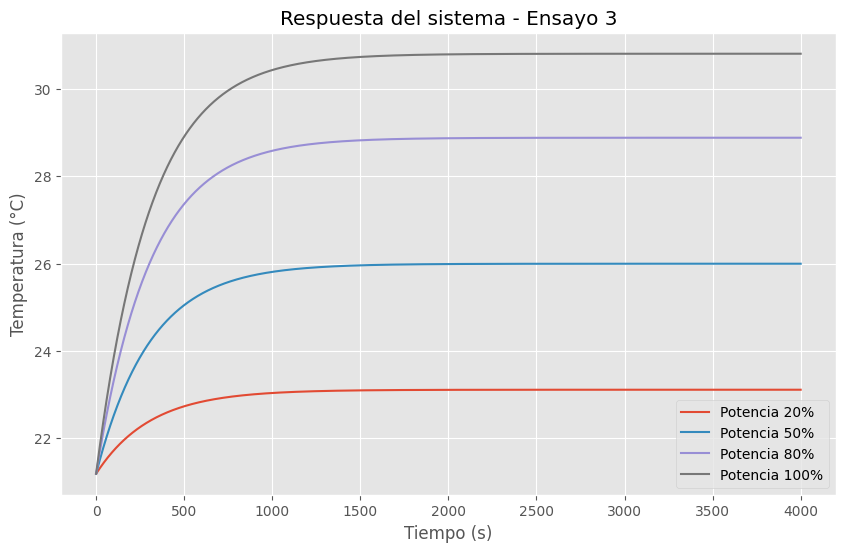

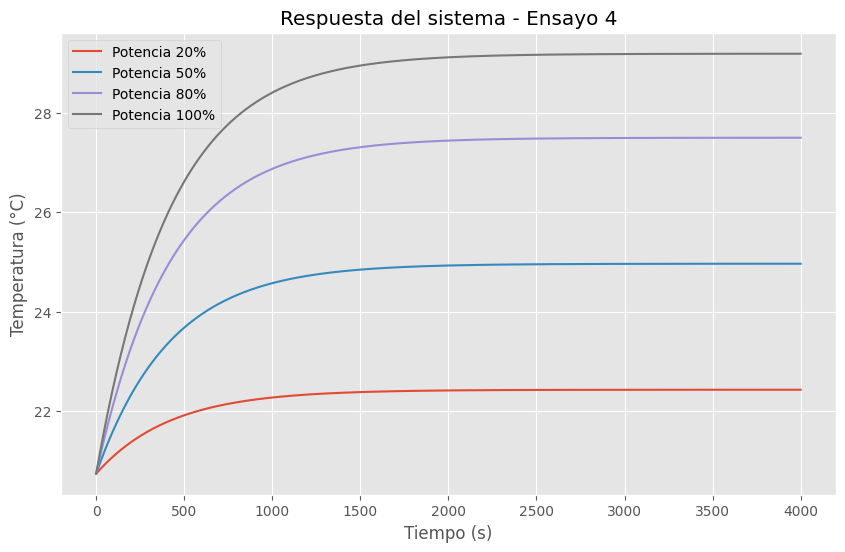

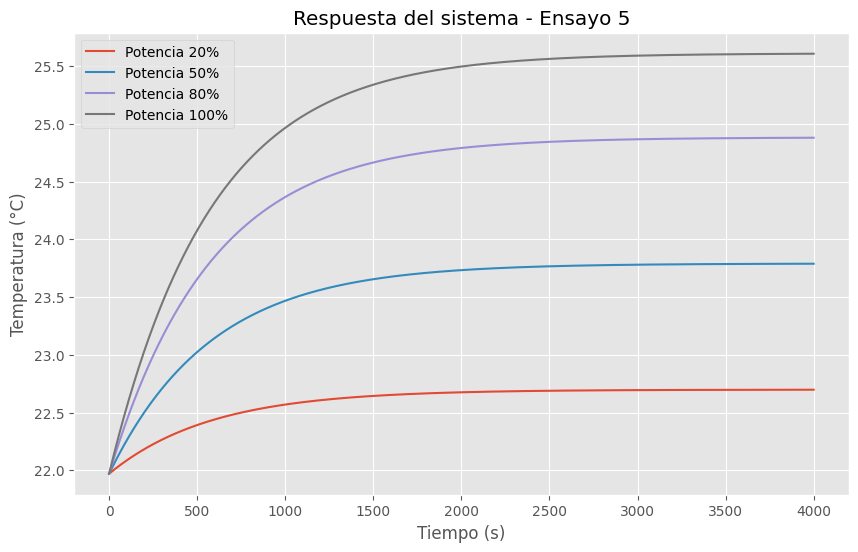

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de respuesta de primer orden
def modelo_primer_orden(t, K, tau, T_inicial, P):
    # P es la potencia aplicada en porcentaje (0 a 1)
    return T_inicial + K * P * (1 - np.exp(-t / tau))

# Definir los niveles de potencia que queremos simular (en porcentaje)
niveles_potencia = [0.2, 0.5, 0.8, 1.0]  # 20%, 50%, 80%, 100%

# Definir los tiempos de simulación
tiempo = np.linspace(0, 4000, 4000)  # Simular hasta 4000 segundos
# Valores obtenidos de los ensayos
ensayos = [
    {'K': 17.08, 'tau': 355.73, 'T_inicial': 20.41},
    {'K': 13.35, 'tau': 365.64, 'T_inicial': 21.01},
    {'K': 9.63, 'tau': 307.87, 'T_inicial': 21.18},
    {'K': 8.45, 'tau': 420.45, 'T_inicial': 20.74},
    {'K': 3.64, 'tau': 577.98, 'T_inicial': 21.97}
]

# Simulación para cada ensayo
for i, ensayo in enumerate(ensayos):
    plt.figure(figsize=(10, 6))
    for P in niveles_potencia:
        # Calcular la respuesta para cada nivel de potencia
        temperatura = modelo_primer_orden(tiempo, ensayo['K'], ensayo['tau'], ensayo['T_inicial'], P)
        plt.plot(tiempo, temperatura, label=f'Potencia {P*100:.0f}%')

    # Configuración de la gráfica
    plt.title(f'Respuesta del sistema - Ensayo {i+1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

K promedio: 10.83
tau promedio: 405.13
T_inicial promedio: 21.06


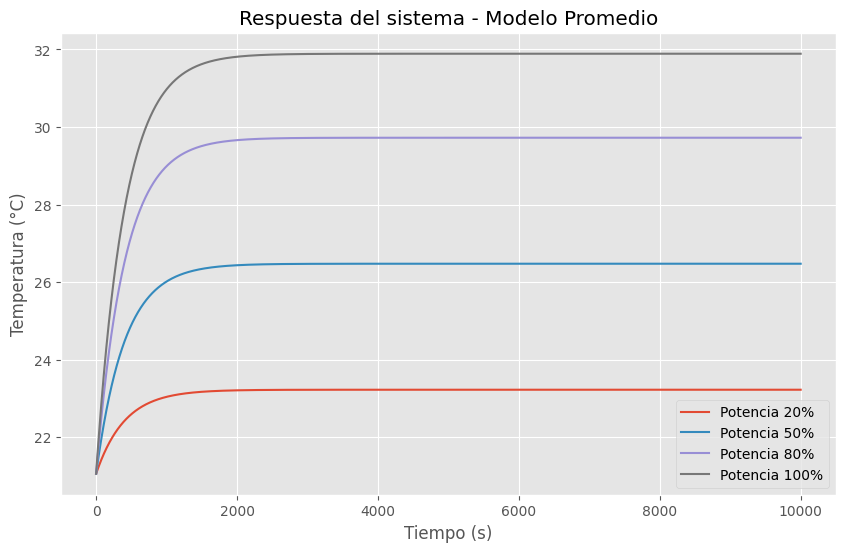

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de respuesta de primer orden
def modelo_primer_orden(t, K, tau, T_inicial, P):
    return T_inicial + K * P * (1 - np.exp(-t / tau))

# Valores promedio obtenidos de los ensayos
K_promedio = 10.83
tau_promedio = 405.13
T_inicial_promedio = 21.06

print(f"K promedio: {K_promedio:.2f}")
print(f"tau promedio: {tau_promedio:.2f}")
print(f"T_inicial promedio: {T_inicial_promedio:.2f}")

# Definir los niveles de potencia que queremos simular (en porcentaje)
niveles_potencia = [0.2, 0.5, 0.8, 1.0]  # 20%, 50%, 80%, 100%

# Definir los tiempos de simulación
tiempo = np.linspace(0, 10000, 10000)  # Simular hasta 4000 segundos

# Simulación usando los valores promedio
plt.figure(figsize=(10, 6))
for P in niveles_potencia:
    # Calcular la respuesta para cada nivel de potencia
    temperatura = modelo_primer_orden(tiempo, K_promedio, tau_promedio, T_inicial_promedio, P)
    plt.plot(tiempo, temperatura, label=f'Potencia {P*100:.0f}%')

# Configuración de la gráfica
plt.title(f'Respuesta del sistema - Modelo Promedio')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()


Se asume que se han realizado ensayos con el ventilador a diferentes velocidades y que los archivos CSV están nombrados como ensayo_con_ventilador_1.csv, ..., ensayo_con_ventilador_5.csv.

In [15]:
# Lista para almacenar los DataFrames de cada ensayo con ventilador
ensayos_con_ventilador = []

# Leer los archivos CSV de los ensayos con ventilador
for i in range(1, 6):
    archivo = f'CSV registros/ensayo_con_ventilador_{i}.csv'
    df = pd.read_csv(archivo, encoding='latin1')
    ensayos_con_ventilador.append(df)

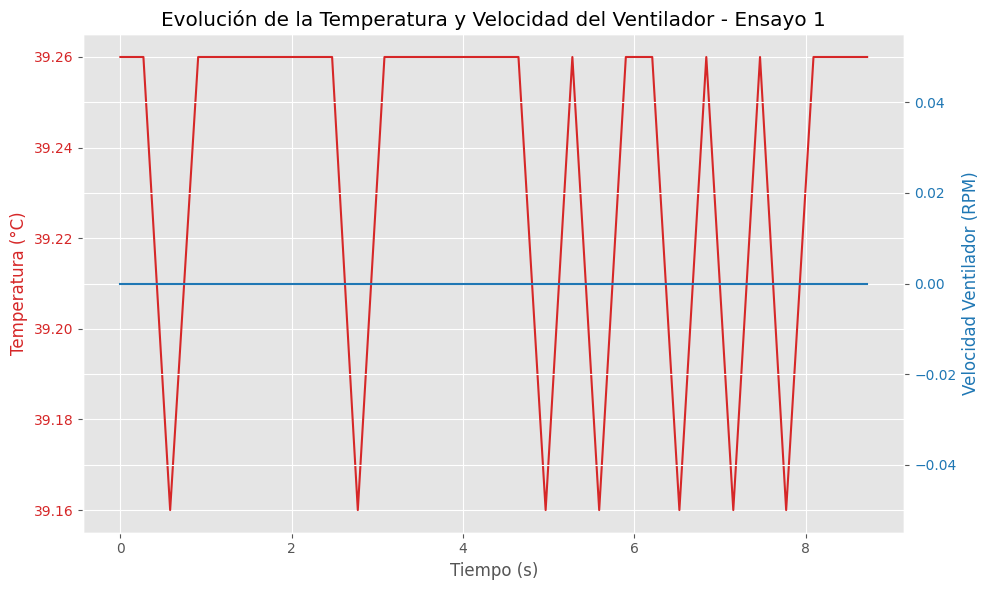

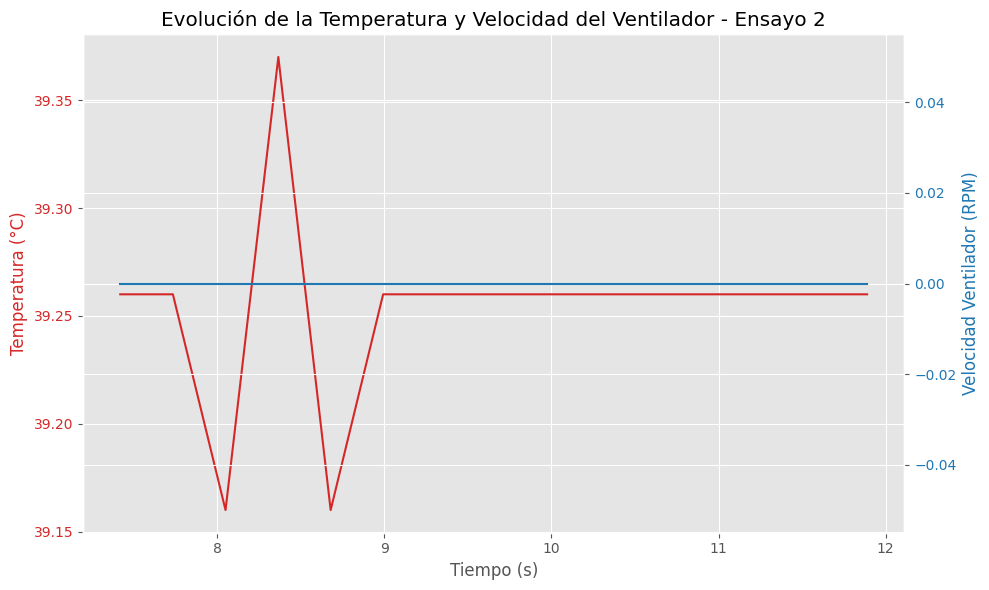

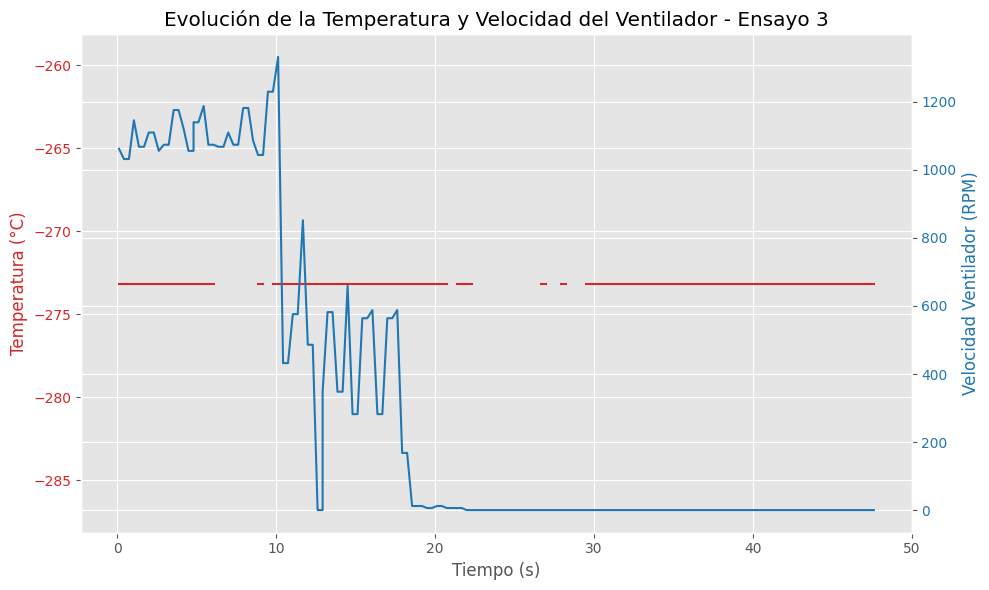

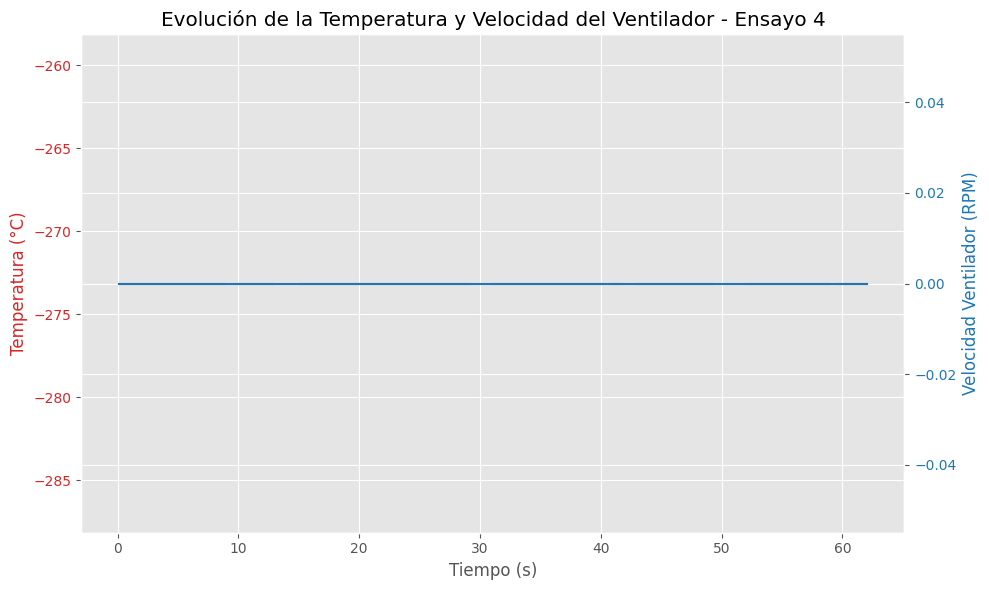

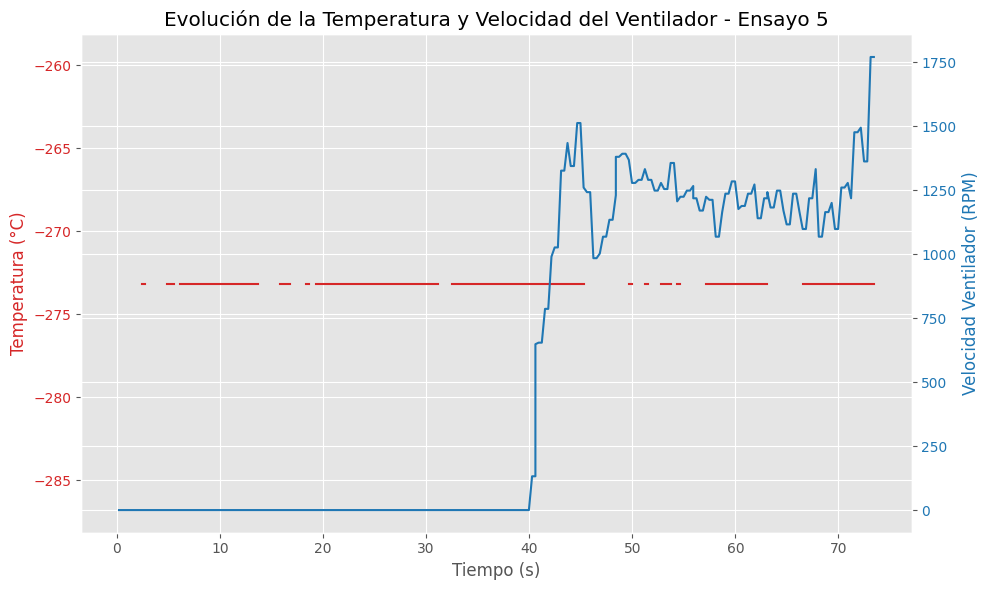

In [16]:
# Graficar los ensayos con ventilador
for i, df in enumerate(ensayos_con_ventilador):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    ax1.set_title(f'Evolución de la Temperatura y Velocidad del Ventilador - Ensayo {i+1}')
    ax1.set_xlabel('Tiempo (s)')
    
    color = 'tab:red'
    ax1.set_ylabel('Temperatura (°C)', color=color)
    ax1.plot(df['Tiempo'], df['Temperatura (°C)'], color=color, label='Temperatura')
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Velocidad Ventilador (RPM)', color=color)
    ax2.plot(df['Tiempo'], df['Velocidad Ventilador (RPM)'], color=color, label='Velocidad Ventilador')
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    plt.show()